In [1]:
import pandas as pd
import os
import seaborn
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

In [3]:
df = pd.DataFrame({'A': [1, 2, 3, 4], 'B': [2, 5, 6, 7]})
df['B'] = df.apply(lambda x: 0 if x['A'] >= 3 else x['B'], axis=1)
print(df)

   A  B
0  1  2
1  2  5
2  3  0
3  4  0


In [3]:
def save_image(image_path, image_name, fg):
    try:
        os.makedirs(image_path)
    except:
        pass

    output_path = f'{image_path}/{image_name}'
    print(output_path)
    fg.savefig(output_path, dpi=800, facecolor='white')

def plot_potential_single(data, x, y, err, hue, x_label, y_label, title, image_path, image_name, show_plot):
    fg = seaborn.FacetGrid(data=data, hue=hue, height=6,
                           aspect=1.6, legend_out=True)
    fg.figure.suptitle(title)
    if err is None:
        fg.map(plt.errorbar, x, y, mfc=None, fmt='o', ms=5, capsize=5, lw=0.5, ls=None).add_legend()
    else:
        fg.map(plt.errorbar, x, y, err, mfc=None, fmt='o', ms=5, capsize=5, lw=0.5, ls=None).add_legend()

    fg.ax.set_xlabel(x_label)
    fg.ax.set_ylabel(y_label)
    fg.ax.spines['right'].set_visible(True)
    fg.ax.spines['top'].set_visible(True)
    fg.ax.minorticks_on()
    fg.ax.tick_params(which='both', bottom=True,
                      top=True, left=True, right=True)
    plt.grid(dash_capstyle='round')

    if show_plot:
        plt.show()
    save_image(f'{image_path}',
               f'{image_name}', fg)
    if not show_plot:
        plt.close()

In [4]:
def make_df_parameters(parameters):
    df = []
    for param in parameters:
        df.append(pd.DataFrame(param))
    return pd.concat(df)

   Nt      a    mu  sigma  sigma_err  sigma_lat  sigma_lat_err       mu_MeV  \
0  20  0.052  0.00    482          7     0.0159         0.0014     0.000000   
1  20  0.052  0.25    307         84     0.0067         0.0033   948.677885   
2  20  0.052  0.35    230         99     0.0040         0.0029  1328.149038   
3  20  0.052  0.45    144        147     0.0022         0.0024  1707.620192   
0  24  0.052  0.00    483          7     0.0165         0.0012     0.000000   
1  24  0.052  0.25    430         37     0.0131         0.0020   948.677885   
2  24  0.052  0.35    295         56     0.0063         0.0024  1328.149038   
3  24  0.052  0.45    227         77     0.0038         0.0024  1707.620192   
0  28  0.054  0.00    485          5     0.0176         0.0010     0.000000   
1  28  0.054  0.25    446         31     0.0149         0.0019   913.541667   
2  28  0.054  0.35    319         45     0.0077         0.0022  1278.958333   
3  28  0.054  0.45    249         55     0.0048     

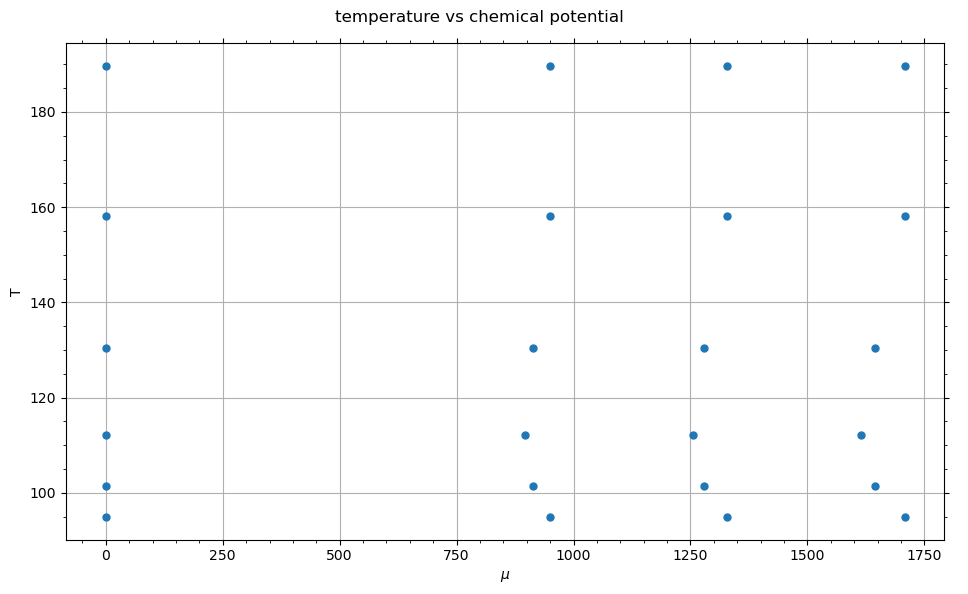

../../images/qc2dstag/phase_diagram/parameters


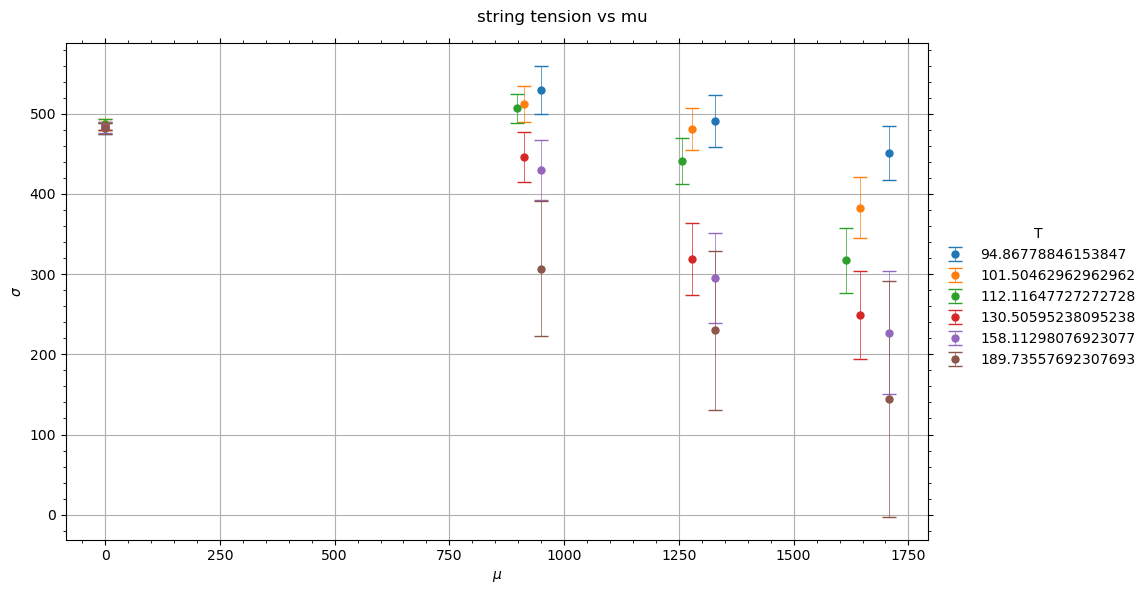

../../images/qc2dstag/phase_diagram/sigma_mu


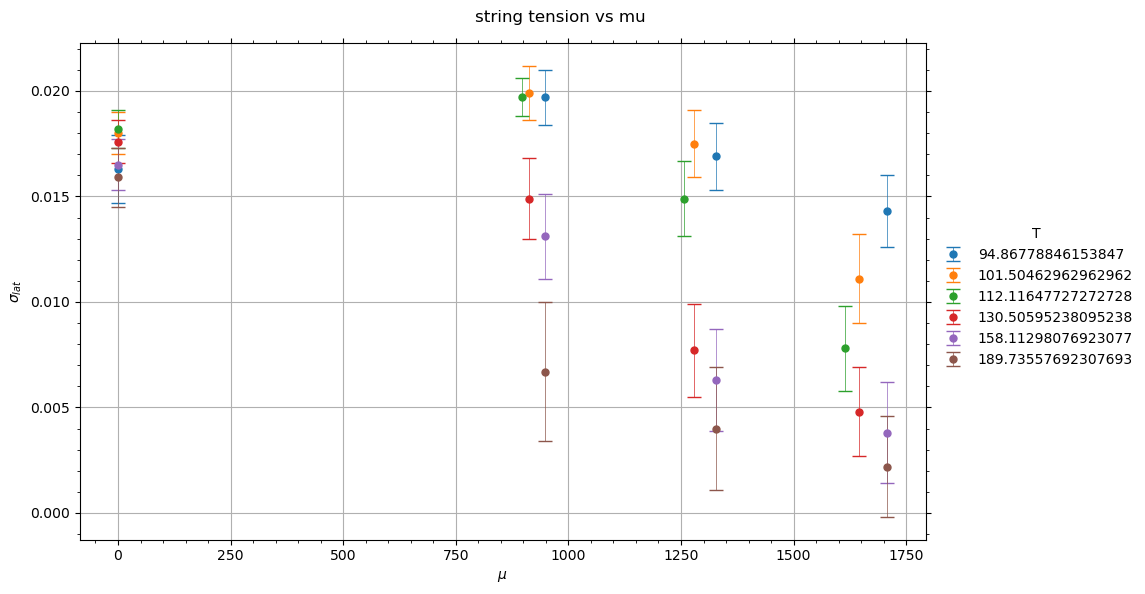

../../images/qc2dstag/phase_diagram/sigma_lat_mu


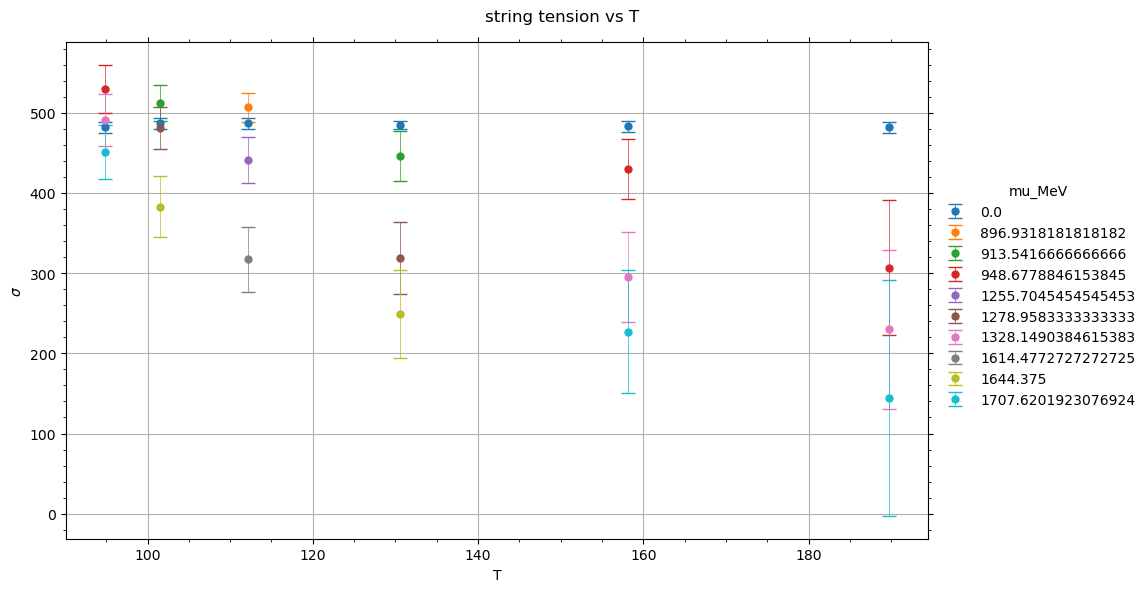

../../images/qc2dstag/phase_diagram/sigma_T


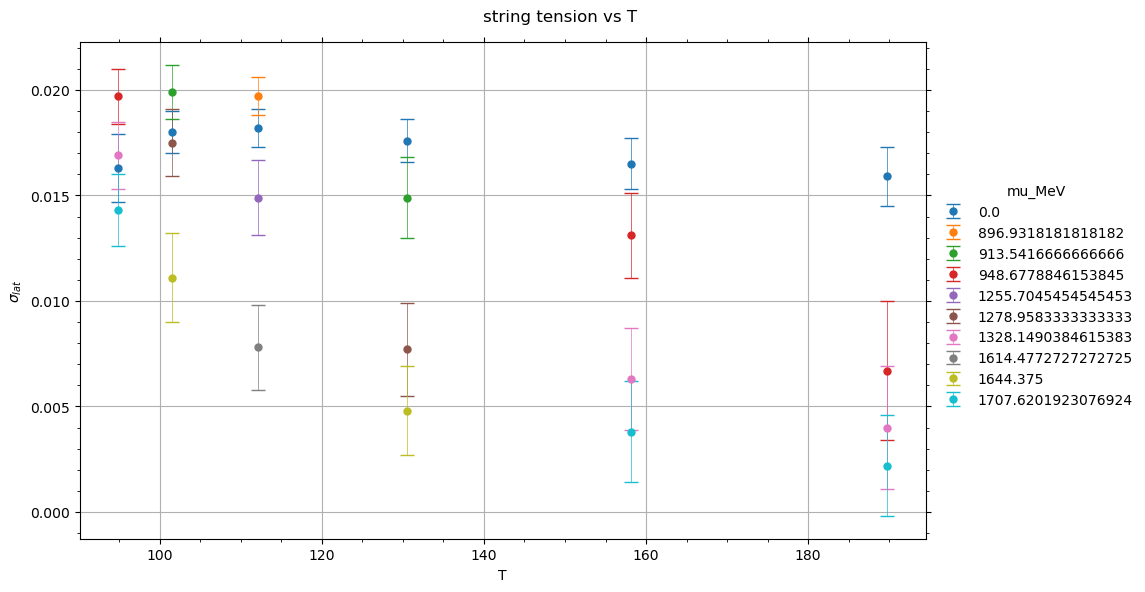

../../images/qc2dstag/phase_diagram/sigma_lat_T


In [5]:
parameters = [{'Nt': 20, 'a': 0.052, 'mu': [0, 0.25, 0.35, 0.45], 'sigma': [482, 307, 230, 144], 'sigma_err': [7, 84, 99, 147], 'sigma_lat': [0.0159, 0.0067, 0.0040, 0.0022], 'sigma_lat_err': [0.0014, 0.0033, 0.0029, 0.0024]},
              {'Nt': 24, 'a': 0.052, 'mu': [0, 0.25, 0.35, 0.45], 'sigma': [483, 430, 295, 227], 'sigma_err': [7, 37, 56, 77], 'sigma_lat': [0.0165, 0.0131, 0.0063, 0.0038], 'sigma_lat_err': [0.0012, 0.0020, 0.0024, 0.0024]},
              {'Nt': 28, 'a': 0.054, 'mu': [0, 0.25, 0.35, 0.45], 'sigma': [485, 446, 319, 249], 'sigma_err': [5, 31, 45, 55], 'sigma_lat': [0.0176, 0.0149, 0.0077, 0.0048], 'sigma_lat_err': [0.0010, 0.0019, 0.0022, 0.0021]},
              {'Nt': 32, 'a': 0.055, 'mu': [0, 0.25, 0.35, 0.45], 'sigma': [487, 507, 441, 317], 'sigma_err': [7, 18, 29, 41], 'sigma_lat': [0.0182, 0.0197, 0.0149, 0.0078], 'sigma_lat_err': [0.0009, 0.0009, 0.0018, 0.0020]},
              {'Nt': 36, 'a': 0.054, 'mu': [0, 0.25, 0.35, 0.45], 'sigma': [487, 512, 481, 383], 'sigma_err': [7, 22, 26, 38], 'sigma_lat': [0.0180, 0.0199, 0.0175, 0.0111], 'sigma_lat_err': [0.0010, 0.0013, 0.0016, 0.0021]},
              {'Nt': 40, 'a': 0.052, 'mu': [0, 0.25, 0.35, 0.45], 'sigma': [482, 530, 491, 451], 'sigma_err': [7, 30, 32, 34], 'sigma_lat': [0.0163, 0.0197, 0.0169, 0.0143], 'sigma_lat_err': [0.0016, 0.0013, 0.0016, 0.0017]}]
df = make_df_parameters(parameters)
fm_to_MeV = 197.325
df['mu_MeV'] = df['mu'] / df['a'] * fm_to_MeV
df['T'] = 1 / df['Nt'] / df['a'] * fm_to_MeV
print(df)
plot_potential_single(df, 'mu_MeV', 'T', None, None, r'$\mu$', 'T', 'temperature vs chemical potential', '../../images/qc2dstag/phase_diagram', 'parameters', True)
plot_potential_single(df, 'mu_MeV', 'sigma', 'sigma_err', 'T', r'$\mu$', r'$\sigma$', 'string tension vs mu', '../../images/qc2dstag/phase_diagram', 'sigma_mu', True)
plot_potential_single(df, 'mu_MeV', 'sigma_lat', 'sigma_lat_err', 'T', r'$\mu$', r'$\sigma_{lat}$', 'string tension vs mu', '../../images/qc2dstag/phase_diagram', 'sigma_lat_mu', True)
plot_potential_single(df, 'T', 'sigma', 'sigma_err', 'mu_MeV', 'T', r'$\sigma$', 'string tension vs T', '../../images/qc2dstag/phase_diagram', 'sigma_T', True)
plot_potential_single(df, 'T', 'sigma_lat', 'sigma_lat_err', 'mu_MeV', 'T', r'$\sigma_{lat}$', 'string tension vs T', '../../images/qc2dstag/phase_diagram', 'sigma_lat_T', True)

In [6]:
parameters = [{'Nt': 20, 'a': 0.052, 'mu': [0, 0.25, 0.35, 0.45]},
              {'Nt': 24, 'a': 0.052, 'mu': [0, 0.25, 0.35, 0.45]},
              {'Nt': 28, 'a': 0.054, 'mu': [0, 0.25, 0.35, 0.45]},
              {'Nt': 32, 'a': 0.055, 'mu': [0, 0.25, 0.35, 0.45]},
              {'Nt': 36, 'a': 0.054, 'mu': [0, 0.25, 0.35, 0.45]},
              {'Nt': 40, 'a': 0.052, 'mu': [0, 0.25, 0.35, 0.45]},
              ]
beta = 1.75
am = 0.0075
alambda = 0.005625
Ns = 20

In [ ]:
conf_parameters_rrcmpi = [{'Nt': 24, 'Ns': 24, 'a': 0.044, 'mu': [0.05, 0.30]},
                          {'Nt': 16, 'Ns': 32, 'a': 0.044, 'mu': [0.15]},
                          {'Nt': 20, 'Ns': 32, 'a': 0.044, 'mu': [0.15]},
                          {'Nt': 24, 'Ns': 32, 'a': 0.044, 'mu': [0.15]},
                          {'Nt': 28, 'Ns': 32, 'a': 0.044, 'mu': [0.15, 0.2]},
                          {'Nt': 32, 'Ns': 32, 'a': 0.044, 'mu': [0, 0.15, 0.2, 0.25, 0.3, 0.4]},
                          {'Nt': 36, 'Ns': 32, 'a': 0.044, 'mu': [0.15, 0.2]},
                          {'Nt': 40, 'Ns': 32, 'a': 0.044, 'mu': [0.15, 0.2]},
                          {'Nt': 64, 'Ns': 32, 'a': 0.044, 'mu': [0.1, 0.4]},
                          {'Nt': 8, 'Ns': 32, 'a': 0.044, 'mu': [0.15]},
                          {'Nt': 40, 'Ns': 40, 'a': 0.044, 'mu': [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.33, 0.35, 0.37, 0.4, 0.45, 0.5]}]

    Nt  Ns      a    mu       mu_MeV           T
0   24  24  0.044  0.05   224.232955  186.860795
1   24  24  0.044  0.30  1345.397727  186.860795
0   16  32  0.044  0.15   672.698864  280.291193
0   20  32  0.044  0.15   672.698864  224.232955
0   24  32  0.044  0.15   672.698864  186.860795
0   28  32  0.044  0.15   672.698864  160.166396
1   28  32  0.044  0.20   896.931818  160.166396
0   32  32  0.044  0.00     0.000000  140.145597
1   32  32  0.044  0.15   672.698864  140.145597
2   32  32  0.044  0.20   896.931818  140.145597
3   32  32  0.044  0.25  1121.164773  140.145597
4   32  32  0.044  0.30  1345.397727  140.145597
5   32  32  0.044  0.40  1793.863636  140.145597
0   36  32  0.044  0.15   672.698864  124.573864
1   36  32  0.044  0.20   896.931818  124.573864
0   40  32  0.044  0.15   672.698864  112.116477
1   40  32  0.044  0.20   896.931818  112.116477
0   64  32  0.044  0.10   448.465909   70.072798
1   64  32  0.044  0.40  1793.863636   70.072798
0    8  32  0.044  0

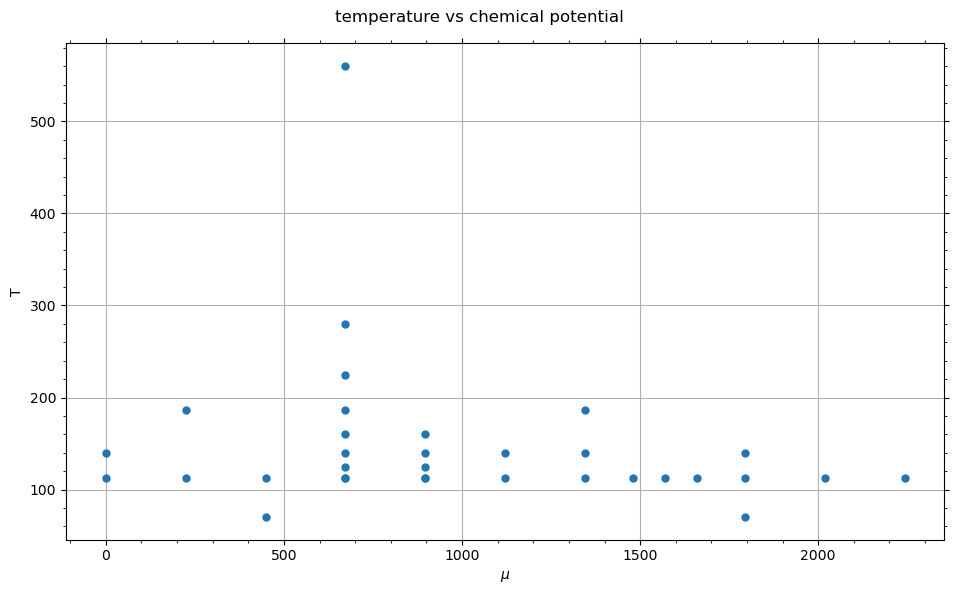

../../images/qc2dstag/phase_diagram/parameters


In [20]:
df = make_df_parameters(conf_parameters_rrcmpi)
fm_to_MeV = 197.325
df['mu_MeV'] = df['mu'] / df['a'] * fm_to_MeV
df['T'] = 1 / df['Nt'] / df['a'] * fm_to_MeV
print(df)
csv_path = '../../data/conf_data/su2/qc2dstag'
try:
    os.makedirs(csv_path)
except:
    pass
df.to_csv(f'{csv_path}/rrcmpi_real_mu_confs.csv', sep=' ', index=False, float_format='%.3f')
plot_potential_single(df, 'mu_MeV', 'T', None, None, r'$\mu$', 'T', 'temperature vs chemical potential', '../../images/qc2dstag/phase_diagram', 'parameters', True)